# Referencias Bibliograficas 
## Todos los problemas fueron sacaron del siguiente libro 

### Devore, J. L. (2008). Probabilidad y estadística para ingeniería y ciencias (7ª ed.). México: International Thomson Editores. Paginas (361, 362 y 363).

### ISBN: 9789706867208

https://intranetua.uantof.cl/facultades/csbasicas/matematicas/academicos/jreyes/DOCENCIA/APUNTES/APUNTES%20PDF/Probabilidad%20y%20Estadistica%20para%20Ingenieria%20y%20Ciencias%20-%20Jay%20Devore%20-%20Septima%20Edicion.pdf


## Ejemplo-7-calculo-de-valores-y-percentiles-f


🔗 Navegación:  
[Menú principal](./MenuDistribucionF.ipynb) | [Ir a Ejemplo 8](#Ejemplo-8-calculo-del-valor-p)

### Problema

7. Obtenga o calcule las siguientes cantidades:
a. F₀.₀₅,₅,₈  
b. F₀.₀₅,₈,₅  
c. F₀.₉₅,₅,₈  
d. F₀.₉₅,₈,₅  
e. El percentil 99 de la distribución F con v₁ = 10, v₂ = 12  
f. El percentil uno de la distribución F con v₁ = 10, v₂ = 12  
g. P(F ≤ 6.16) para v₁ = 6, v₂ = 4  
h. P(0.177 ≤ F ≤ 4.74) para v₁ = 10, v₂ = 5



a. F₀.₀₅,₅,₈ = 0.2075
b. F₀.₀₅,₈,₅ = 0.2712
c. F₀.₉₅,₅,₈ = 3.6875
d. F₀.₉₅,₈,₅ = 4.8183
e. Percentil 99 (v₁=10, v₂=12) = 4.2961
f. Percentil 1 (v₁=10, v₂=12) = 0.2125
g. P(F ≤ 6.16) con v₁=6, v₂=4 = 0.9500
h. P(0.177 ≤ F ≤ 4.74) con v₁=10, v₂=5 = 0.9402


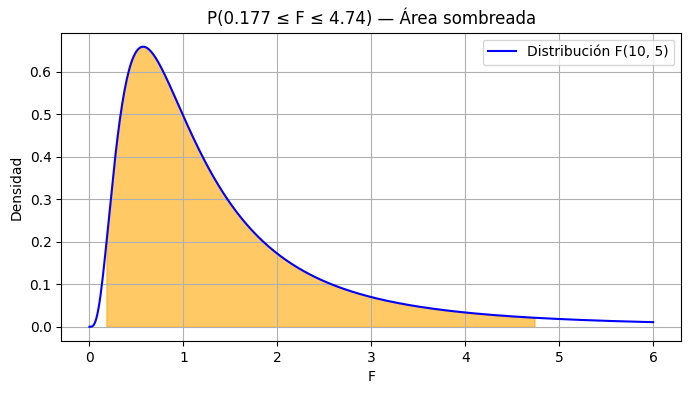

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# a-d: Valores críticos F
a = f.ppf(0.05, 5, 8)
b = f.ppf(0.05, 8, 5)
c = f.ppf(0.95, 5, 8)
d = f.ppf(0.95, 8, 5)

# e-f: Percentiles
e = f.ppf(0.99, 10, 12)
f_ = f.ppf(0.01, 10, 12)

# g: P(F ≤ 6.16)
g = f.cdf(6.16, 6, 4)

# h: P(0.177 ≤ F ≤ 4.74)
h = f.cdf(4.74, 10, 5) - f.cdf(0.177, 10, 5)

print(f"a. F₀.₀₅,₅,₈ = {a:.4f}")
print(f"b. F₀.₀₅,₈,₅ = {b:.4f}")
print(f"c. F₀.₉₅,₅,₈ = {c:.4f}")
print(f"d. F₀.₉₅,₈,₅ = {d:.4f}")
print(f"e. Percentil 99 (v₁=10, v₂=12) = {e:.4f}")
print(f"f. Percentil 1 (v₁=10, v₂=12) = {f_:.4f}")
print(f"g. P(F ≤ 6.16) con v₁=6, v₂=4 = {g:.4f}")
print(f"h. P(0.177 ≤ F ≤ 4.74) con v₁=10, v₂=5 = {h:.4f}")

# Gráfica para inciso h (sombreado entre 0.177 y 4.74)
x = np.linspace(0, 6, 500)
y = f.pdf(x, 10, 5)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Distribución F(10, 5)', color='blue')
plt.fill_between(x, y, where=(x >= 0.177) & (x <= 4.74), color='orange', alpha=0.6)
plt.title('P(0.177 ≤ F ≤ 4.74) — Área sombreada')
plt.xlabel('F')
plt.ylabel('Densidad')
plt.grid(True)
plt.legend()
plt.show()


## Ejemplo-8-calculo-del-valor-p
🔗 Navegación:  
[Ir a Ejemplo 7](#Ejemplo-7-calculo-de-valores-y-percentiles-f) | [Ir a Ejemplo 9](#Ejemplo-9-comparacion-de-varianzas) | [Menú principal](./MenuDistribucionF.ipynb)

### Problema

8. Dé tanta información como pueda sobre el valor P de la prueba F en cada una de las siguientes situaciones:
a. v₁ = 5, v₂ = 10, prueba de cola superior, f = 4.75  
b. v₁ = 5, v₂ = 10, prueba de cola superior, f = 2.00  
c. v₁ = 5, v₂ = 10, prueba de dos colas, f = 4.75  
d. v₁ = 5, v₂ = 10, prueba de cola inferior, f = 0.200  
e. v₁ = 35, v₂ = 20, prueba de cola superior, f = 3.24



In [5]:
# Incisos a-e
datos = [
    (5, 10, 4.75, 'cola superior'),
    (5, 10, 2.00, 'cola superior'),
    (5, 10, 4.75, 'dos colas'),
    (5, 10, 0.200, 'cola inferior'),
    (35, 20, 3.24, 'cola superior')
]

for v1, v2, F0, tipo in datos:
    if tipo == 'cola superior':
        p = 1 - f.cdf(F0, v1, v2)
        print(f"F = {F0} con v1={v1}, v2={v2} → p-valor (cola superior) = {p:.4f}")
    elif tipo == 'cola inferior':
        p = f.cdf(F0, v1, v2)
        print(f"F = {F0} con v1={v1}, v2={v2} → p-valor (cola inferior) = {p:.4f}")
    elif tipo == 'dos colas':
        p = 2 * min(f.cdf(F0, v1, v2), 1 - f.cdf(F0, v1, v2))
        print(f"F = {F0} con v1={v1}, v2={v2} → p-valor (dos colas) = {p:.4f}")


F = 4.75 con v1=5, v2=10 → p-valor (cola superior) = 0.0175
F = 2.0 con v1=5, v2=10 → p-valor (cola superior) = 0.1642
F = 4.75 con v1=5, v2=10 → p-valor (dos colas) = 0.0351
F = 0.2 con v1=5, v2=10 → p-valor (cola inferior) = 0.0448
F = 3.24 con v1=35, v2=20 → p-valor (cola superior) = 0.0035


## Ejemplo-9-comparacion-de-varianzas

🔗 Navegación:  
[Ir a Ejemplo 8](#Ejemplo-8-calculo-del-valor-p) | [Menú principal](./MenuDistribucionF.ipynb)

### Problema

Se desea probar si la varianza de ferritina en adultos mayores es menor que en adultos jóvenes.

- H₀: σ₁² = σ₂²  
- Hₐ: σ₁² < σ₂²  
- Nivel de significancia: α = 0.01  
- s₁ = 52.6 (n₁ = 28, adultos mayores)  
- s₂ = 84.2 (n₂ = 26, adultos jóvenes)  

El valor crítico es F₀.99,27,25 = 1 / F₀.01,25,27 = 1 / 2.54 ≈ 0.394.  
El valor calculado es F = (52.6)² / (84.2)² ≈ 0.390.


F calculado: 0.390
Valor crítico F₀.99,27,25 ≈ 2.575
✅ Se rechaza H₀: hay evidencia de que la varianza es menor en adultos mayores.


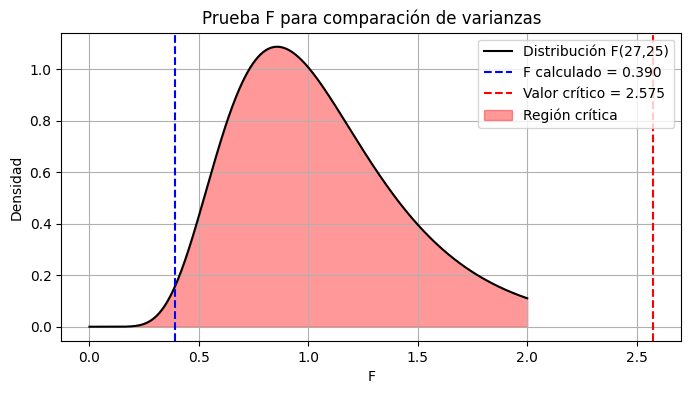

In [4]:
# Datos
s1 = 52.6
s2 = 84.2
n1 = 28
n2 = 26

F = (s1**2) / (s2**2)
vc = 1 / f.ppf(0.01, dfn=n2 - 1, dfd=n1 - 1)  # F(0.99,27,25)

print(f"F calculado: {F:.3f}")
print(f"Valor crítico F₀.99,27,25 ≈ {vc:.3f}")

if F <= vc:
    print("✅ Se rechaza H₀: hay evidencia de que la varianza es menor en adultos mayores.")
else:
    print("❌ No se rechaza H₀: no hay evidencia suficiente.")

# Gráfica
x = np.linspace(0, 2, 500)
y = f.pdf(x, dfn=n1 - 1, dfd=n2 - 1)

plt.figure(figsize=(8, 4))
plt.plot(x, y, color='black', label='Distribución F(27,25)')
plt.axvline(F, color='blue', linestyle='--', label=f'F calculado = {F:.3f}')
plt.axvline(vc, color='red', linestyle='--', label=f'Valor crítico = {vc:.3f}')
plt.fill_between(x, y, where=(x <= vc), color='red', alpha=0.4, label='Región crítica')
plt.title('Prueba F para comparación de varianzas')
plt.xlabel('F')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()
